# MA124 Maths by Computer: Assignment 1

Student number: 2161367 

---


In [1]:
# Import standard libraries

import numpy as np
import matplotlib.pyplot as plt

---

## A. Taylor series approximations

One can approximate $\sin(x)$ using a finite number of terms of a Taylor series:

$$
\sin(x) \simeq \sum_{n=0}^N (-1)^n\frac{x^{2n+1}}{(2n+1)!} 
$$

One can also approximate the natural logarithm $\ln(1+x)$ using a finite number of terms of a Taylor series:

$$
\log(1+x) \simeq \sum_{n=1}^N (-1)^{n+1} \frac{x^n}{n}
$$

In this notebook we will explore these approximations, in particular how they depend on $N$. 





In [2]:
# Functions to compute Taylor series approximations for sine and logarithm

def sin_approx(x,N):
    """Computes the approximation of sin(x) for all x simultaneously"""
    total = 0 * x
    for n in range(N+1):
        total += (-1)**n * x**(2*n+1)/np.math.factorial(2*n+1)
    return total,x

def exp_approx(x,N):
    """Computes the approximation of log(1+x) for all x simultaneously """
    total = 0 * x
    for n in range(1,N+1):
        total += (-1)**(n+1) * x**n/n
    return total,x


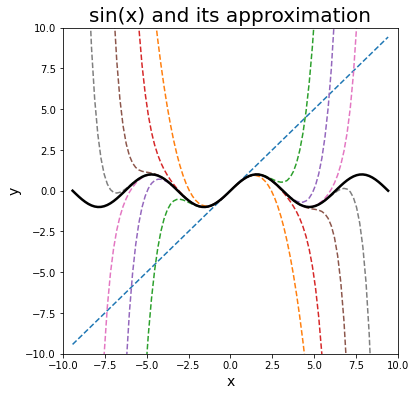

In [3]:
# Generate plots comparing exact and Taylor approximations for sine

# set N, there will be N+1 terms in the approximation
# and set the range of x
N = 7
x = np.linspace(-3*np.pi,3*np.pi,101)

# Creates one graph to plot all approximations
plt.figure(figsize=(6,6))

# Calling function from above
for N in range(N+1):
    total,x = sin_approx(x,N)
    plt.plot(x,total, '--',)
    
# Generate the exact sin graph
y = np.sin(x)

# Plot the results
plt.plot(x,y,"k-",lw=2.5)

# Graph settings
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("sin(x) and its approximation", fontsize=20)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

The figure above shows the Taylor approximation for sine.

The approximations are shown as the colourful dashed lines while the true sine graph is shown with a solid black line. As we can see, with a greater number of terms, the closer it approximates to the true sine graph.

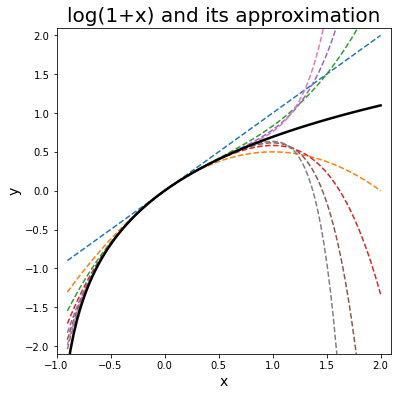

In [4]:
# Generate plots comparing exact and Taylor approximations for the natural logarithm 

# set N, there will be N terms in the approximation
# and set the range of x
N = 8
x = np.linspace(-0.9,2,101)

# Creates one graph to plot all approximations
plt.figure(figsize=(6,6))

# Calling function from above
for N in range(1,N+1):
    total,x = exp_approx(x,N)
    plt.plot(x,total, '--',)
    
# Generate the exact exponential graph
y = np.log(1+x)

# Plot the results
plt.plot(x,y,"k-",lw=2.5)

# Graph settings
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("log(1+x) and its approximation", fontsize=20)
plt.xlim(-1,2.1)
plt.ylim(-2.1,2.1)
plt.show()

The figure above shows the Taylor approximation for $log(1+x)$

Similar to the sine approximation, the colourful dashed lines show the approximations while the solid black line is the true graph of $log(1+x)$.

---

### Error plots (Challenge section)


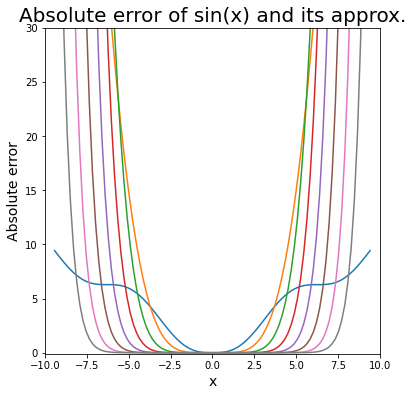

In [5]:
# Generates a plot of the absolute error of the Taylor approximation and the true sine graph

# set N, there will be N+1 terms in the approximation
# and set the range of x
N = 7
x = np.linspace(-3*np.pi,3*np.pi,101)

# Creates one graph to plot all approximations
plt.figure(figsize=(6,6))

# Calling function from above
for N in range(N+1):
    total,x = sin_approx(x,N)
    y = abs(np.sin(x)-total)
    plt.plot(x,y)

# Graph settings
plt.xlabel("x", fontsize=14)
plt.ylabel("Absolute error", fontsize=14)
plt.title("Absolute error of sin(x) and its approx.", fontsize=20)
plt.xlim(-10,10)
plt.ylim(-0.1,30)
plt.show()

The figure above shows the absolute error of sin(x) and its approximation. As we can see, each interation of the series results in less error for greater values of absolute x. 

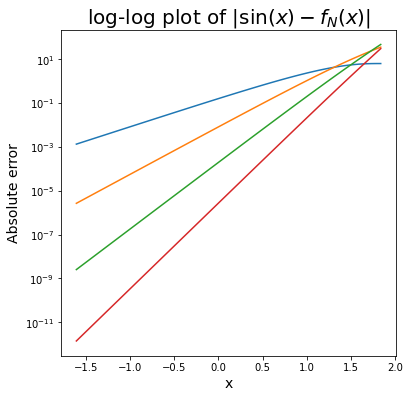

In [6]:
# Generates a log-log plot of the absolute error of the Taylor approximation and the true sine graph

# set N, there will be N+1 terms in the approximation
# and set the range of x
N = 3
x = np.linspace(0.2,2*np.pi,101)

# Creates one graph to plot all approximations
plt.figure(figsize=(6,6))

# Calling function from above
for N in range(N+1):
    total,x = sin_approx(x,N)
    y = abs(np.sin(x)-total)
    plt.semilogy(np.log(x),y)

# Graph settings
plt.xlabel("x", fontsize=14)
plt.ylabel("Absolute error", fontsize=14)
plt.title("log-log plot of $|\sin(x)-f_N(x)|$", fontsize=20)
plt.show()

The figure above shows the absolute error on a logarithmic scale as a function of x for $x\in[0.2,2\pi]$ for N = 0, 1, 2, 3. The graph shows at a large enough x, the error of the $y=x$ graph has less error. This is due to the fact that the bigger polynomials grow much faster and their error grows with said speed. That is why the slope is steeper as well.

---
## B. Parametric roller coaster

Here we present an original design for a parametric roller coaster. 

---

### Mathematical Description of the roller coaster

$x_1(t) = 2\cos(2t) ,\; y_1(t) = \frac{3}{2}t,\; z_1(t) = 2\sin(2t),\;  t\in[0,2\pi]$

$x_2(t) = \sin(t) + 2,\; y_2(t) = t,\; z_2(t) = 2t,\;  t\in[2\pi,4\pi]$

$x_3(t) = 2,\; y_3(t) = t + 2\pi,\; z_3(t) = 4\pi - t^2,\;  t\in[4\pi,4\pi+4]$

$x_4(t) = t \cos(3t) + 2,\; y_4(t) = t \sin(3t) + 4 + 2\pi,\; z_4(t) = t - 16 + 4\pi,\;  t\in[4\pi+4,6\pi+4]$

$x_5(t) = 2\pi +2,\; y_5(t) = 2\pi+4-\sin(t),\; z_5(t) = 6\pi-16-t,\;  t\in[6\pi+4,7\pi+4]$ 

$x_6(t) = 2+2\pi-2\pi t,\; y_6(t) = 2\pi + 4 - (4-\pi)t,\; z_6(t) = 5\pi-16-(5\pi-16)t,\;  t\in[7\pi+4,7\pi+5]$ 

Start of section 1, the helix tunnel, is 2.0 , 9.425 , -0.0 and the end is 2.0 , 0.0 , 0.0
Start of section 2, the sin wave climb, is 2.0 , 0.0 , 0.0 and the end is 2.0 , 6.283 , 12.566
Start of section 3, the parabola "drop", is 2.0 , 6.283 , 12.566 and the end is 2.0 , 10.283 , -3.434
Start of section 4, the spiral, is 2.0 , 10.283 , -3.434 and the end is 8.283 , 10.283 , 2.85
Start of section 5, the straight line, is 8.283 , 10.283 , 2.85 and the end is 8.283 , 10.283 , -0.292
Start of section 6, the straight line, is 8.283 , 10.283 , -0.292 and the end is 2.0 , 9.425 , 0.0


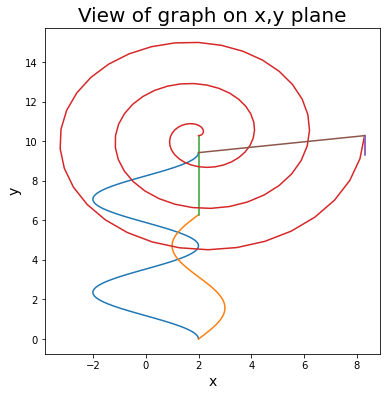

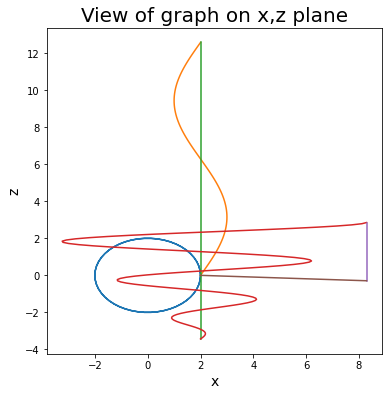

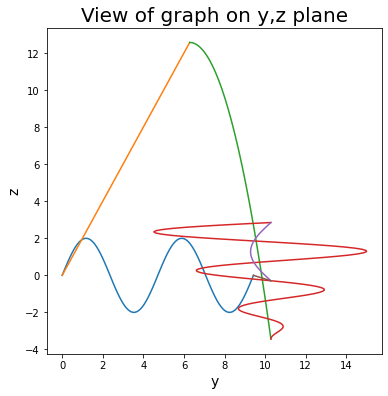

In [7]:
# Creating a rollercoster using different sections of parametrised curves
# Let x, y make up the ground plane and z be the vertical axis

# Section 1, a side ways helix
R = 2
kappa = 3/2
t1 = np.linspace(2*np.pi,0,101)
x1 = R * np.cos(2*t1)
y1 = kappa * t1
z1 = R * np.sin(2*t1)
print("Start of section 1, the helix tunnel, is", round(x1[0],3),",", round(y1[0],3),",", round(z1[0],3), "and the end is",round(x1[-1],3),",", round(y1[-1],3),",", round(z1[-1],3))
# print statement for each section rounds the x, y, z, coordinates to 3 decimal places for the beginning and end of the specified section

# Section 2, a sin wave going up
t2 = np.linspace(0,2*np.pi,101)
x2 = np.sin(t2) + 2
y2 = t2
z2 = 2 * t2
print("Start of section 2, the sin wave climb, is", round(x2[0],3),",", round(y2[0],3),",", round(z2[0],3), "and the end is",round(x2[-1],3),",", round(y2[-1],3),",", round(z2[-1],3))

# Section 3, part of a parabola dropping down
t3 = np.linspace(0,4,101)
x3 = 2 + 0 * t3
y3 = t3 + 2*np.pi
z3 = -(t3**2) + 4*np.pi
print("Start of section 3, the parabola \"drop\", is", round(x3[0],3),",", round(y3[0],3),",", round(z3[0],3), "and the end is",round(x3[-1],3),",", round(y3[-1],3),",", round(z3[-1],3))

# Section 4, a spiral
t4 = np.linspace(0,2 * np.pi,101)
x4 = t4 * np.cos(3*t4) + 2
y4 = t4 * np.sin(3*t4) + 4 + 2 * np.pi
z4 = t4 - 16 + 4*np.pi
print("Start of section 4, the spiral, is", round(x4[0],3),",", round(y4[0],3),",", round(z4[0],3), "and the end is",round(x4[-1],3),",", round(y4[-1],3),",", round(z4[-1],3))

# Section 5, a downward sin wave
t5 = np.linspace(0,np.pi,101)
x5 = (2*np.pi + 2) + 0 * t5
y5 = (2*np.pi + 4) - np.sin(t5)
z5 = (6*np.pi - 16) - t5
print("Start of section 5, the straight line, is", round(x5[0],3),",", round(y5[0],3),",", round(z5[0],3), "and the end is",round(x5[-1],3),",", round(y5[-1],3),",", round(z5[-1],3))

# Section 6, a straight line
t6 = np.linspace(0,1,101)
x6 = (2*np.pi + 2) - 2*np.pi*t6
y6 = (2*np.pi + 4) - (4 - np.pi)*t6
z6 = (5*np.pi - 16) - (5*np.pi - 16) * t6
print("Start of section 6, the straight line, is", round(x6[0],3),",", round(y6[0],3),",", round(z6[0],3), "and the end is",round(x6[-1],3),",", round(y6[-1],3),",", round(z6[-1],3))


# Plotting the sections
# This view is on the x, y plane
plt.figure(figsize=(6,6))
plt.title("View of graph on x,y plane", fontsize=20)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.show()

# This view is on the x, z plane
plt.figure(figsize=(6,6))
plt.title("View of graph on x,z plane", fontsize=20)
plt.plot(x1,z1)
plt.plot(x2,z2)
plt.plot(x3,z3)
plt.plot(x4,z4)
plt.plot(x5,z5)
plt.plot(x6,z6)
plt.xlabel("x",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.show()

# This view is on the y, z plane
plt.figure(figsize=(6,6))
plt.title("View of graph on y,z plane", fontsize=20)
plt.plot(y1,z1)
plt.plot(y2,z2)
plt.plot(y3,z3)
plt.plot(y4,z4)
plt.plot(y5,z5)
plt.plot(y6,z6)
plt.xlabel("y",fontsize=14)
plt.ylabel("z",fontsize=14)
plt.show()


The graphs above show a view from the x,y plane, x,z plane, and the y,z plane.

### Description of the roller coaster

You first get on the roller coaster at (2.0 , 9.245 , 0.0) and begin through a horizontal helix.

This then leads to a steep climb up following the pattern of a sine wave. 

At the top, the roller coaster plumets quickly on a parabolic trajectory and ends at the bottom of a spiral. 

This spiral then connects to a downward sine curve.

This then ends with a straight stretch of track that leads back to the start.

And hopefully at the end of it the riders want to go again!
